In [1]:
%matplotlib inline

In [2]:
import gc
import numpy as np
import pandas as pd
from datetime import datetime
import xgboost as xgb
import matplotlib.pyplot as plt
from tqdm import tqdm


In [3]:
BASE = './'
transpose_microbusiness_density = pd.read_csv(BASE + 'k_means_graph.csv')

In [4]:
test__d = transpose_microbusiness_density.copy()
test__d.columns = test__d.columns.str.replace('2019-', '19')
test__d.columns = test__d.columns.str.replace('2020-', '20')
test__d.columns = test__d.columns.str.replace('2021-', '21')
test__d.columns = test__d.columns.str.replace('2022-', '22')
test__d.columns = test__d.columns.str.replace('2023-', '23')
test__d.columns = test__d.columns.str.replace('-01', '')

In [5]:
test__d.drop(['cfips','county','state','K-means_Elbow','K-means_Silhouette'],inplace=True,axis=1)
test__d.dropna(axis=1,inplace=True)

In [6]:
scaled_df = pd.DataFrame(columns=test__d.columns)
for index in tqdm(range(len(test__d))):
    X_norm_list = []
    for i in range(len(test__d.loc[index])):
        X_norm = (test__d.loc[index][i] - min(test__d.loc[index])) / (max(test__d.loc[index]) - min(test__d.loc[index]))
        X_norm_list.append(X_norm)
    scaled_df.loc[index] = X_norm_list

100%|██████████████████████████████████████████████████████████████████████████████| 3135/3135 [00:50<00:00, 61.74it/s]


### 시계열 데이터에서 군집화를 사용할 때 동적 시간 왜곡(DTW)를 사용한다고 합니다.
### 그리고 DTW를 사용할 때 2가지 분석을 같이 사용하는데 엘보우 분석, 실루엣분석을 사용한다고 합니다.(최적의 K값을 찾기위해)
### 진행결과 적정 K값은 2개 14개가 나왔습니다.
### 아래 보이시는 그래프는 2개 14개로 총 16개의 그래프와 해당 cfips 목록입니다.
### print() 없이 내용만 출력하시면 리스트 형태로 반환받으실 수 있습니다.

## K_means 을 통한 시계열 데이터 를 0과 1 로 나눈 그래프(칼럼명은 엘보우지만 사실 실루엣(k값=2)입니다.)

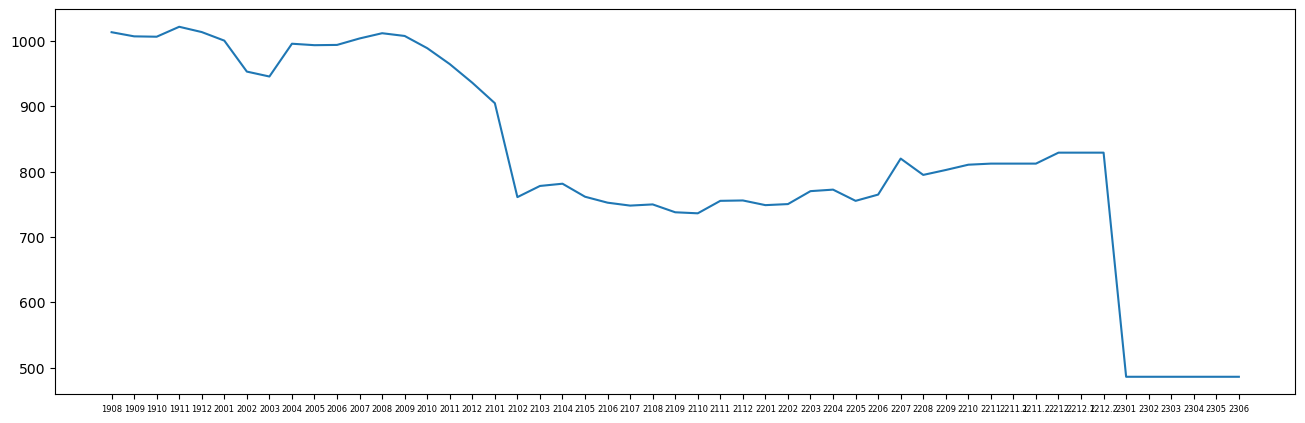

[ 1007  1011  1015 ... 56037 56039 56041]


In [38]:
num = 0
K_means_graph = scaled_df.loc[transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Silhouette']==num].index].sum()
plt.plot(K_means_graph)
fig = plt.gcf()
fig.set_size_inches(16, 5)
plt.xticks(fontsize=6)

plt.show()
print(transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Silhouette']==num]['cfips'].unique())

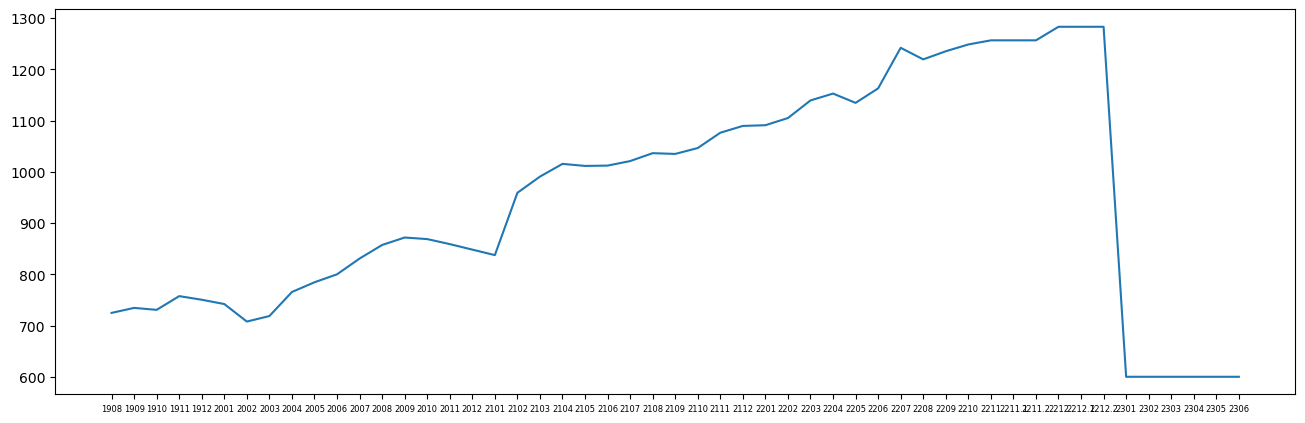

[ 1001  1003  1005 ... 56035 56043 56045]


In [37]:
num = 1
K_means_graph = scaled_df.loc[transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Silhouette']==num].index].sum()
plt.plot(K_means_graph)
fig = plt.gcf()
fig.set_size_inches(16, 5)
plt.xticks(fontsize=6)

plt.show()
print(transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Silhouette']==num]['cfips'].unique())

## K_means 을 통한 시계열 데이터 를 0부터 13  총 14개의 k_mean 클러스터링 으로 나눈 그래프
## (칼럼명은 실루엣지만 엘보우(k값=14)입니다.)

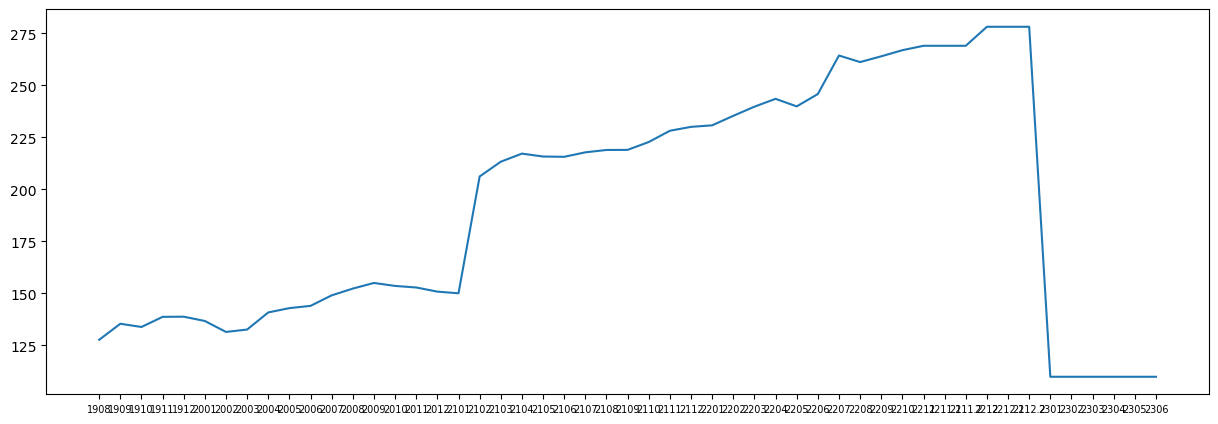

[ 1013  1025  1045  1047  1071  1103  1107  1119  1123  1133  2195  4017
  4023  5001  5015  5029  5039  5049  5089  5125  6005  6031  6035  8047
  8049  8055  8081 12007 12055 12131 12133 13019 13053 13061 13073 13087
 13099 13105 13119 13131 13193 13207 13211 13235 13237 13255 13257 13291
 13309 13317 16037 16043 16045 16047 16049 16051 16065 16073 17023 17027
 17037 17109 17135 17147 17151 17167 18031 18033 18041 18043 18047 18057
 18075 18085 18153 18177 19033 19037 19065 19107 19121 19133 19137 19159
 19181 19189 19195 20003 20023 20039 20077 20085 20089 20113 20127 20133
 20149 20153 20201 20209 21007 21033 21177 21185 21215 22011 22089 22099
 22117 23003 23021 23023 23027 24047 26041 26053 26063 26069 26095 26097
 26123 26133 26143 27021 27027 27071 27075 27111 27135 27141 27161 27169
 28003 28009 28031 28051 28081 28117 28149 28163 29033 29041 29063 29067
 29069 29073 29083 29099 29115 29123 29127 29133 29139 29141 29151 29173
 29183 29211 29229 30009 30019 30047 30067 30079 30

In [20]:
num = 0
K_means_graph = scaled_df.loc[transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==num].index].sum()
plt.plot(K_means_graph)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.xticks(fontsize=7)

plt.show()
print(transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==num]['cfips'].unique())

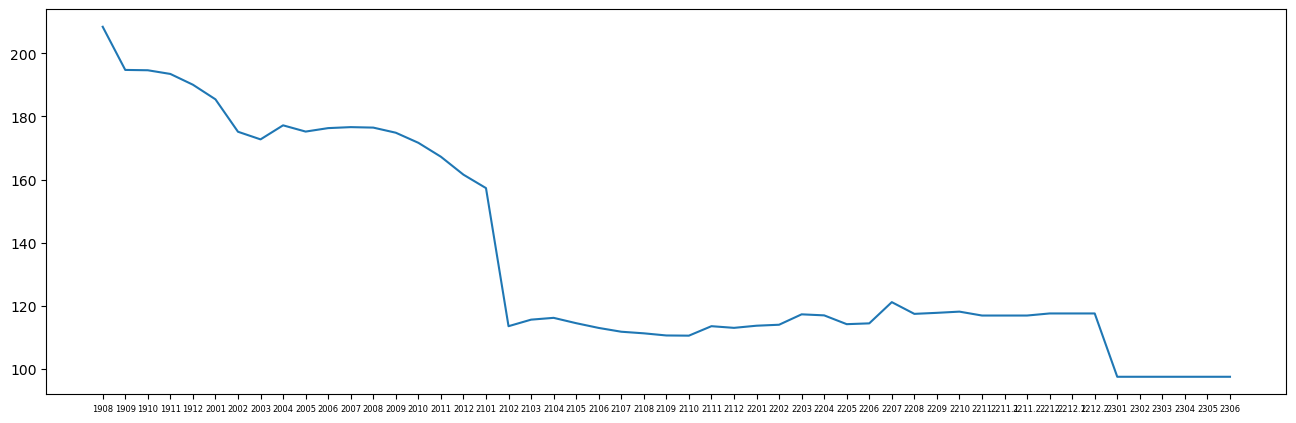

[ 1125  2016  2020  2090  2105  2185  5013  5021  5025  5065  5075  5087
  5091  5113  5127  5131  5141  6021  6051  6075  6081  6083  8005  8013
  8014  8041  8051  8061  8097  8101  8115  8119 12073 12115 13025 13083
 13241 13265 13301 15001 15007 16019 16027 16029 16041 16063 16067 16077
 17019 17021 17029 17033 17045 17059 17069 17077 17101 17111 17133 17169
 17179 18037 18049 18083 18101 18103 18111 18117 18131 18147 18161 18169
 18181 19003 19011 19041 19053 19063 19157 20017 20033 20049 20063 20067
 20135 20143 20195 20199 21023 21047 21051 21055 21069 21117 21165 21175
 21187 21227 22053 22115 23011 23029 25003 25025 26017 26023 26029 26071
 26079 26105 26161 27003 27009 27025 27053 27089 27113 27123 27139 27149
 27151 27155 27167 28055 28119 28155 29009 29023 29081 29085 29089 29091
 29103 29179 29205 30003 30033 30055 30059 30063 30107 31005 31013 31015
 31023 31037 31081 31087 31111 31113 31133 31159 31161 31165 31169 31173
 31175 32001 32003 32013 34017 35006 36031 36083 36

In [39]:
num = 1
K_means_graph = scaled_df.loc[transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==num].index].sum()
plt.plot(K_means_graph)
fig = plt.gcf()
fig.set_size_inches(16, 5)
plt.xticks(fontsize=6)

plt.show()
print(transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==num]['cfips'].unique())

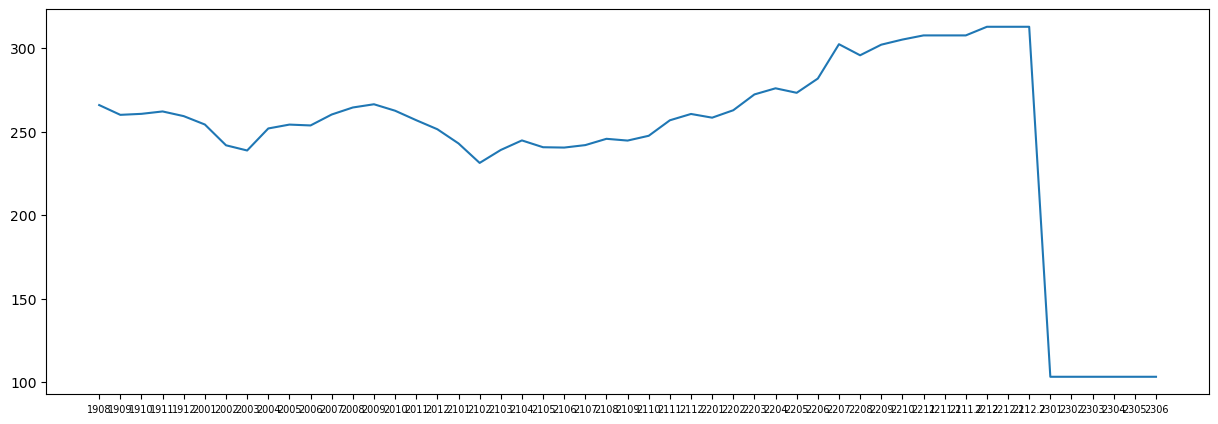

[ 1031  1033  1063  1075  1081  1083  1097  1109  1115  1127  1129  2170
  2188  4003  4013  4015  4019  4021  4027  5007  5009  5047  5057  5059
  5073  5097  5111  5119  6001  6043  6053  6057  6065  6071  6073  6079
  6089  6091  6099  6109  8001  8037  8067  8087  9005 11001 12003 12021
 12027 12035 12057 12059 12069 12083 12085 12097 12101 12119 12121 12129
 13007 13017 13029 13035 13047 13049 13089 13093 13103 13111 13121 13133
 13135 13147 13155 13159 13161 13173 13221 13231 13233 13253 13267 13283
 15009 16001 16011 16053 16069 17011 17039 17041 17053 17073 17081 17091
 17099 17113 17125 17131 17149 17155 17181 18011 18021 18027 18053 18061
 18065 18093 18097 18179 19013 19119 19135 19153 19183 20053 20059 20065
 20069 20071 20099 20161 20173 21025 21027 21045 21053 21083 21093 21131
 21145 21157 21169 21171 21181 21217 21231 22003 22055 22063 22073 22101
 22105 22111 22119 23001 23017 24003 24029 24043 24045 25011 25023 26021
 26047 26055 26135 26139 26145 26153 27017 27019 27

In [22]:
num = 2
K_means_graph = scaled_df.loc[transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==num].index].sum()
plt.plot(K_means_graph)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.xticks(fontsize=7)

plt.show()
print(transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==num]['cfips'].unique())

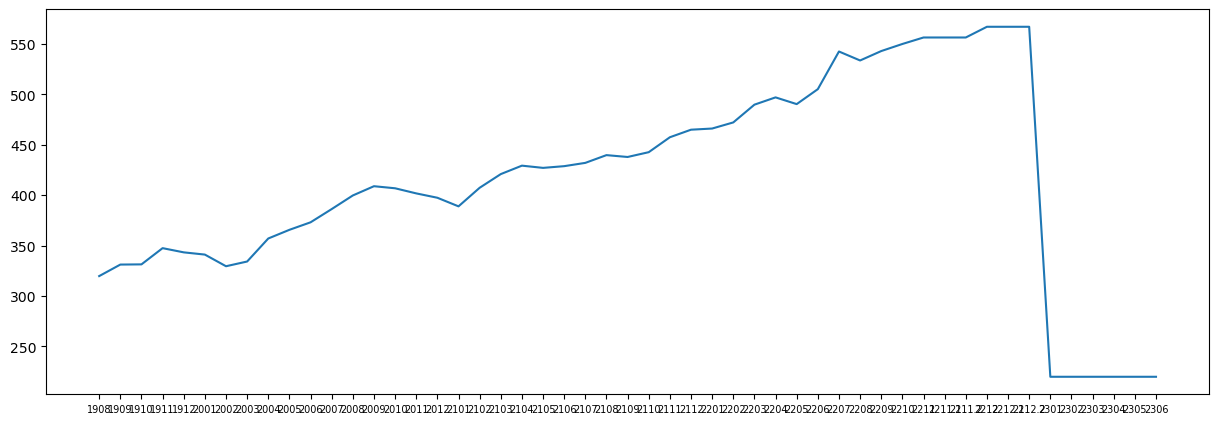

[ 1001  1003  1005  1009  1021  1023  1027  1039  1043  1049  1051  1053
  1055  1059  1061  1065  1073  1079  1089  1093  1095  1099  1111  1113
  1121  2130  2240  2275  2290  5005  5023  5027  5033  5037  5053  5069
  5083  5085  5093  5103  5107  5123  5137  6019  6023  6029  6039  6047
  6067  6069  6077  6095  6107  6111  8029  8063  8079  8083  8089  8105
  8123  9001  9003  9009  9011 10001 10005 12013 12015 12023 12031 12033
 12041 12067 12079 12086 12089 12091 12095 12099 12103 12105 12109 12111
 12113 12123 12125 13005 13009 13011 13021 13023 13033 13045 13051 13059
 13063 13065 13067 13071 13077 13081 13085 13091 13095 13097 13113 13115
 13137 13139 13141 13145 13151 13153 13169 13171 13177 13179 13185 13195
 13199 13205 13215 13217 13223 13229 13247 13251 13261 13271 13275 13277
 13285 13293 13295 13297 13303 13311 13313 13319 13321 16005 16021 16025
 16055 16083 16087 17003 17005 17017 17049 17061 17097 17119 17129 17143
 17161 17165 17189 17195 17197 17199 18003 18007 18

In [23]:
num = 3
K_means_graph = scaled_df.loc[transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==num].index].sum()
plt.plot(K_means_graph)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.xticks(fontsize=7)

plt.show()
print(transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==num]['cfips'].unique())

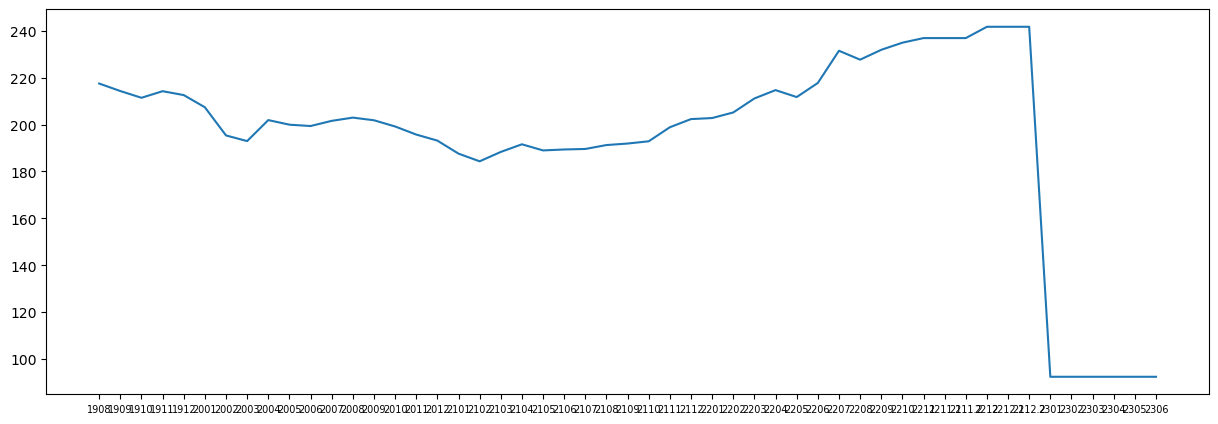

[ 1007  1011  1017  1037  1085  2282  4005  4025  5045  5071  5099  5101
  5115  5149  6009  6013  6033  6037  6041  6045  6049  6059  6061  6087
  8027  8057  8065  8113  9007 12005 12011 12051 12071 12081 12087 12117
 13013 13039 13043 13101 13127 13227 13245 15003 16007 16017 16057 16075
 17055 17057 17095 17139 17177 17183 17201 18005 18017 18059 18063 18069
 18095 18099 18109 18119 18127 18151 18159 18171 18183 19029 19051 19083
 19087 19127 19145 19169 19171 20001 20013 20019 20021 20045 20051 20093
 20103 20111 20115 20131 20197 21001 21011 21017 21031 21035 21115 21123
 21127 21209 21221 21233 21237 22001 22013 22085 22125 23015 23031 24009
 24015 24025 24027 24037 25013 25017 25021 26005 26009 26035 26039 26061
 26087 26099 26111 26119 26125 26149 26155 26157 27045 27049 27059 27065
 27073 27081 27085 27133 27137 27143 27163 27165 27171 28001 28019 28079
 28083 28085 28097 28121 28125 28129 29021 29047 29057 29095 29097 29113
 29121 29125 29163 29169 29195 29197 29215 29219 30

In [24]:
num = 4
K_means_graph = scaled_df.loc[transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==num].index].sum()
plt.plot(K_means_graph)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.xticks(fontsize=7)

plt.show()
print(transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==num]['cfips'].unique())

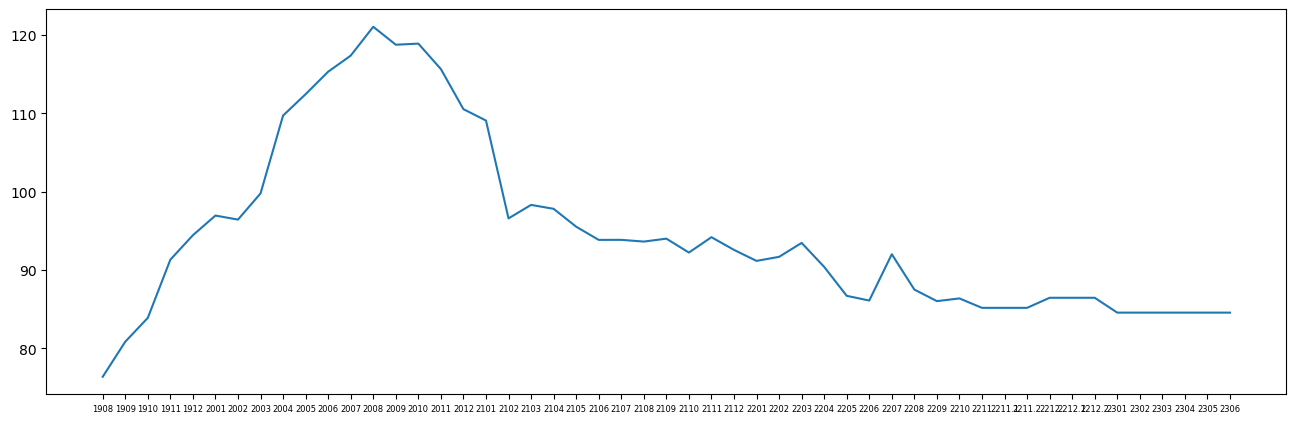

[ 1131  2220  4012  5041  5061  5063  5081  5095  5133  5135  6101  8011
  8031  8043  8069  8111  8125  9015 12001 12019 12029 12037 12045 12065
 12077 12107 12127 13125 13167 13201 13243 13249 13299 13307 16003 16015
 16061 16081 17025 17047 17063 17103 17105 17157 17191 18025 18145 19027
 19067 19085 19093 19125 19129 19141 19143 19155 20009 20011 20025 20107
 20147 20157 20167 20171 20175 20191 21015 21065 21095 21103 21119 21161
 21211 21219 22091 23013 25019 26083 27001 27007 27011 27051 27101 27103
 27105 27117 28021 28025 28053 28141 28157 29001 29017 29037 29075 29101
 29111 29153 29175 29177 29185 29199 30031 30051 31035 31051 31059 31069
 31091 31095 31103 31121 31141 31151 32021 32029 32033 32510 34021 35023
 35033 35053 35061 36011 36051 36091 36097 36117 37017 37019 37075 37113
 37123 37125 37183 37189 38011 38025 38045 38057 38091 38099 39031 39131
 39151 40081 41015 41023 41051 41069 42009 42099 42107 45005 46021 46041
 46061 46077 46107 46109 46123 46127 46137 47107 47

In [40]:
num = 5
K_means_graph = scaled_df.loc[transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==num].index].sum()
plt.plot(K_means_graph)
fig = plt.gcf()
fig.set_size_inches(16, 5)
plt.xticks(fontsize=6)


plt.show()
print(transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==num]['cfips'].unique())

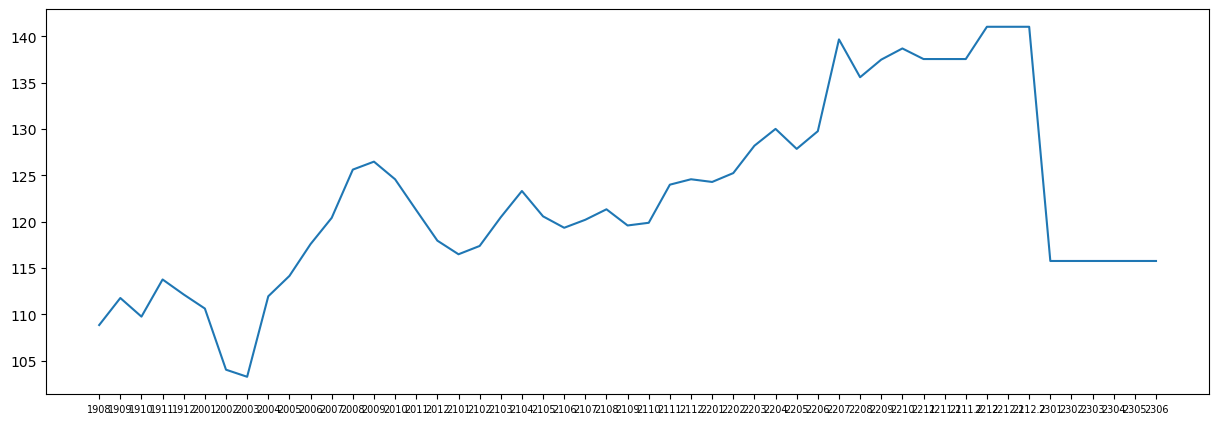

[ 1029  1101  1117  2050  2068  2150  2164  4007  5011  5017  5079  5129
  5147  6017  8045  8071  8073  8075  8095  8109  8121 12017 12053 12093
 13001 13003 13027 13037 13079 13175 13181 13183 13187 13197 13209 13213
 13281 13305 16013 16035 16071 17015 17035 17051 17065 17093 17175 17185
 17203 18009 18013 18029 18077 18107 18113 19009 19035 19039 19059 19081
 19115 19185 20055 20061 20073 20081 20095 20123 20129 20141 20159 20163
 20165 20187 20193 20203 20207 21013 21019 21029 21041 21057 21063 21077
 21089 21097 21107 21121 21153 21159 21229 22035 22065 22107 23009 24011
 26013 26019 26037 26057 26073 26075 26165 27055 27077 27159 27173 28005
 28063 28065 28099 28135 29005 29019 29031 29051 29087 29129 29135 29155
 29217 30007 30021 30037 30089 30109 31033 31049 31053 31077 31083 31099
 31185 32015 32019 33003 34037 34041 35011 35057 36023 36077 37029 37063
 37103 37141 37147 37165 37197 38001 38017 38019 38063 38071 39007 39027
 39045 39049 39053 39057 39091 39105 39117 39133 40

In [26]:
num = 6
K_means_graph = scaled_df.loc[transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==num].index].sum()
plt.plot(K_means_graph)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.xticks(fontsize=7)

plt.show()
print(transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==num]['cfips'].unique())

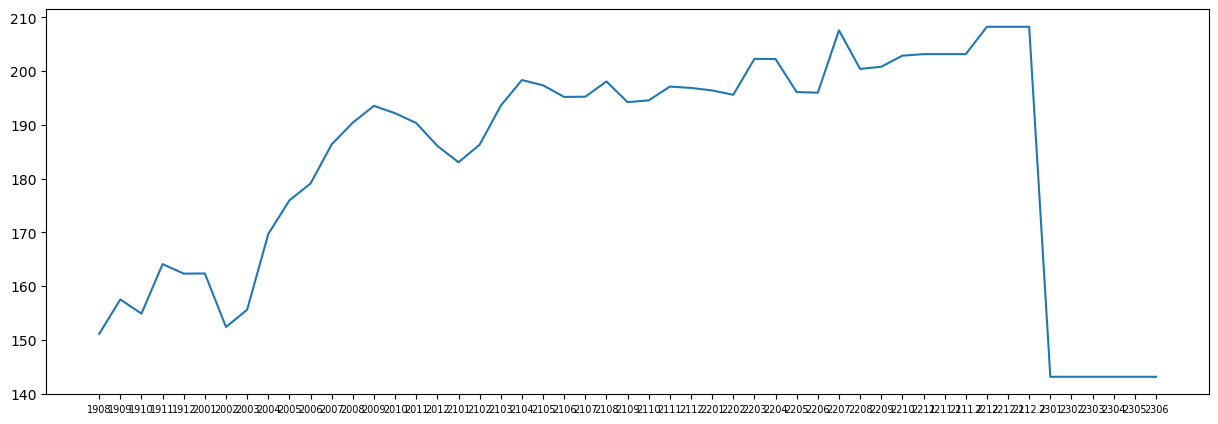

[ 1015  1019  1035  1041  1069  1087  1105  2110  2122  2198  4009  4011
  5019  5031  5043  5077  5105  5145  6007  6015  6025  6055  6103  6105
  8003  8019  8023  8025  8033  8039  8053  8077  8091  8103  8107 10003
 12009 12039 12047 12049 12063 12075 13031 13069 13075 13117 13143 13149
 13163 13165 13225 13259 13263 13269 13287 16023 16031 16033 16039 16079
 16085 17007 17009 17013 17043 17071 17115 17137 17141 17145 17159 18015
 18039 18071 18079 18087 18091 18105 19005 19007 19023 19047 19055 19091
 19109 19117 19131 19165 19175 19179 20007 20031 20035 20043 20047 20083
 20087 20109 20117 20119 20125 20137 20139 20145 20151 20169 20189 21003
 21087 21099 21125 21137 21141 21147 21167 21189 21199 21213 21223 21239
 22015 22041 22043 22071 22083 22109 22121 22123 23005 24005 24019 24031
 24510 25009 26001 26007 26011 26027 26031 26045 26067 26077 26089 26127
 26129 26151 26159 27013 27015 27031 27033 27063 27107 27125 27153 28007
 28035 28041 28069 28101 28111 28123 28131 28137 28

In [27]:
num = 7
K_means_graph = scaled_df.loc[transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==num].index].sum()
plt.plot(K_means_graph)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.xticks(fontsize=7)

plt.show()
print(transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==num]['cfips'].unique())

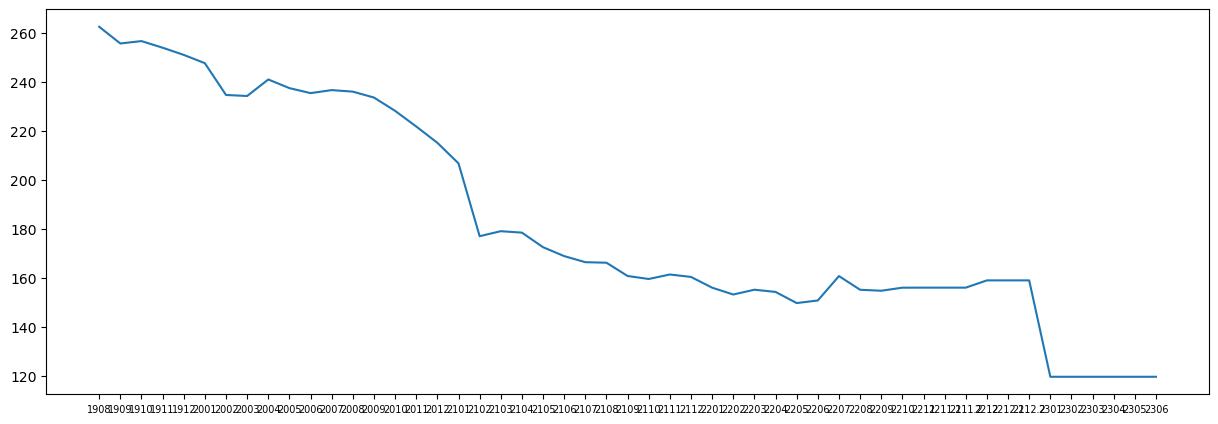

[ 1057  1067  1077  1091  2013  2060  2070  2100  2180  2230  4001  5003
  5035  5051  5055  5067  5109  5117  5121  5139  5143  6003  6011  6027
  6063  6085  6093  6097  6113  6115  8007  8009  8015  8017  8021  8035
  8059  8085  8093  8099  8117  9013 12043 12061 13015 13055 13057 13107
 13109 13123 13129 13157 13189 13191 13219 13239 13273 13279 13289 13315
 15005 16009 16059 17001 17031 17067 17075 17079 17083 17085 17087 17089
 17107 17117 17121 17123 17127 17153 17163 17171 17173 17187 17193 18001
 18019 18051 18067 18115 18121 18123 18125 18129 18137 18157 19001 19017
 19019 19021 19025 19031 19049 19061 19069 19073 19079 19095 19099 19103
 19105 19111 19113 19147 19151 19163 19193 20029 20075 20079 20097 20121
 20155 20179 21059 21061 21081 21085 21091 21101 21105 21109 21113 21133
 21135 21143 21151 21155 21195 21197 21203 21225 21235 22023 22027 22049
 22059 22081 23019 24035 24039 25005 25015 26025 26033 26043 26051 26065
 26103 26109 26117 26131 26141 27005 27037 27047 27

In [28]:
num = 8
K_means_graph = scaled_df.loc[transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==num].index].sum()
plt.plot(K_means_graph)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.xticks(fontsize=7)

plt.show()
print(transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==num]['cfips'].unique())

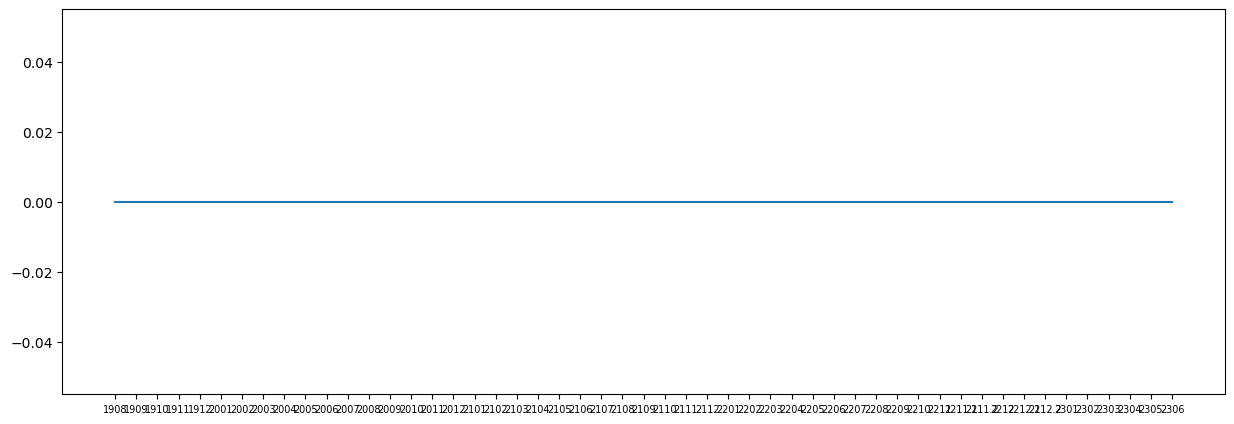

[]


In [29]:
num = 9
K_means_graph = scaled_df.loc[transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==num].index].sum()
plt.plot(K_means_graph)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.xticks(fontsize=7)

plt.show()
print(transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Elbow']==num]['cfips'].unique())

num = 10
K_means_graph = scaled_df.loc[transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Silhouette']==num].index].sum()
plt.plot(K_means_graph)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.xticks(fontsize=7)

plt.show()
print(transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Silhouette']==num]['cfips'].unique())

num = 11
K_means_graph = scaled_df.loc[transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Silhouette']==num].index].sum()
plt.plot(K_means_graph)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.xticks(fontsize=7)

plt.show()
print(transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Silhouette']==num]['cfips'].unique())

num = 12
K_means_graph = scaled_df.loc[transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Silhouette']==num].index].sum()
plt.plot(K_means_graph)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.xticks(fontsize=7)

plt.show()
print(transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Silhouette']==num]['cfips'].unique())

num = 13
K_means_graph = scaled_df.loc[transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Silhouette']==num].index].sum()
plt.plot(K_means_graph)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.xticks(fontsize=7)

plt.show()
print(transpose_microbusiness_density.loc[transpose_microbusiness_density['K-means_Silhouette']==num]['cfips'].unique())